In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pd.read_csv("student_habits_performance.csv")
data

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [4]:
data.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data["parental_education_level"]=data["parental_education_level"].fillna("mode")
data.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [7]:
data=data.drop("student_id",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       1000 non-null   object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

In [8]:
for cols in data.columns:
    if data[cols].dtype=="object":
        print(data[cols].value_counts())
        print(data[cols].nunique())
        print("\n")

gender
Female    481
Male      477
Other      42
Name: count, dtype: int64
3


part_time_job
No     785
Yes    215
Name: count, dtype: int64
2


diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64
3


parental_education_level
High School    392
Bachelor       350
Master         167
mode            91
Name: count, dtype: int64
4


internet_quality
Good       447
Average    391
Poor       162
Name: count, dtype: int64
3


extracurricular_participation
No     682
Yes    318
Name: count, dtype: int64
2




In [23]:
internet=data.groupby(["internet_quality","gender"])["extracurricular_participation"].value_counts()
sns.barplot(x=internet,y="age")

ValueError: Could not interpret input 'age'

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in data.columns:
    if data[col].dtype=="object":
        data[col]=encoder.fit_transform(data[col])
data.dtypes

age                                int64
gender                             int32
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                      int32
attendance_percentage            float64
sleep_hours                      float64
diet_quality                       int32
exercise_frequency                 int64
parental_education_level           int32
internet_quality                   int32
mental_health_rating               int64
extracurricular_participation      int32
exam_score                       float64
dtype: object

In [11]:
data

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1,56.2
1,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0,100.0
2,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0,34.3
3,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8
4,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,0,2.6,0.5,1.6,0,77.0,7.5,0,2,1,1,6,1,76.1
996,17,0,2.9,1.0,2.4,1,86.0,6.8,2,1,1,0,6,1,65.9
997,20,1,3.0,2.6,1.3,0,61.9,6.5,1,5,0,1,9,1,64.4
998,24,1,5.4,4.1,1.1,1,100.0,7.6,0,0,0,0,1,0,69.7


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'study_hours_per_day'}>,
        <Axes: title={'center': 'social_media_hours'}>],
       [<Axes: title={'center': 'netflix_hours'}>,
        <Axes: title={'center': 'part_time_job'}>,
        <Axes: title={'center': 'attendance_percentage'}>,
        <Axes: title={'center': 'sleep_hours'}>],
       [<Axes: title={'center': 'diet_quality'}>,
        <Axes: title={'center': 'exercise_frequency'}>,
        <Axes: title={'center': 'parental_education_level'}>,
        <Axes: title={'center': 'internet_quality'}>],
       [<Axes: title={'center': 'mental_health_rating'}>,
        <Axes: title={'center': 'extracurricular_participation'}>,
        <Axes: title={'center': 'exam_score'}>, <Axes: >]], dtype=object)

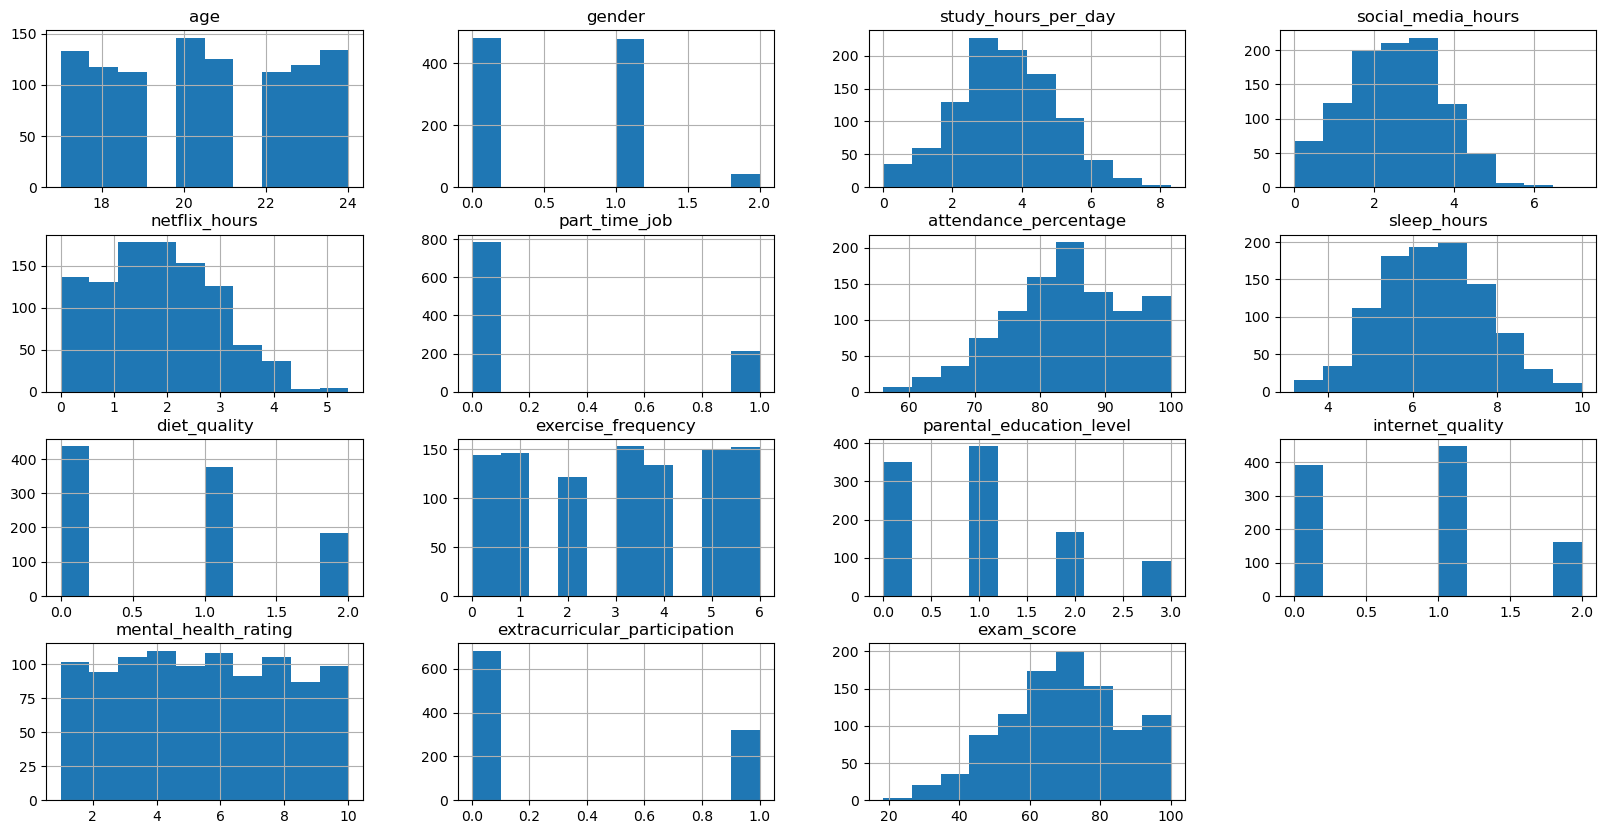

In [12]:
data.hist(figsize=(20,10))

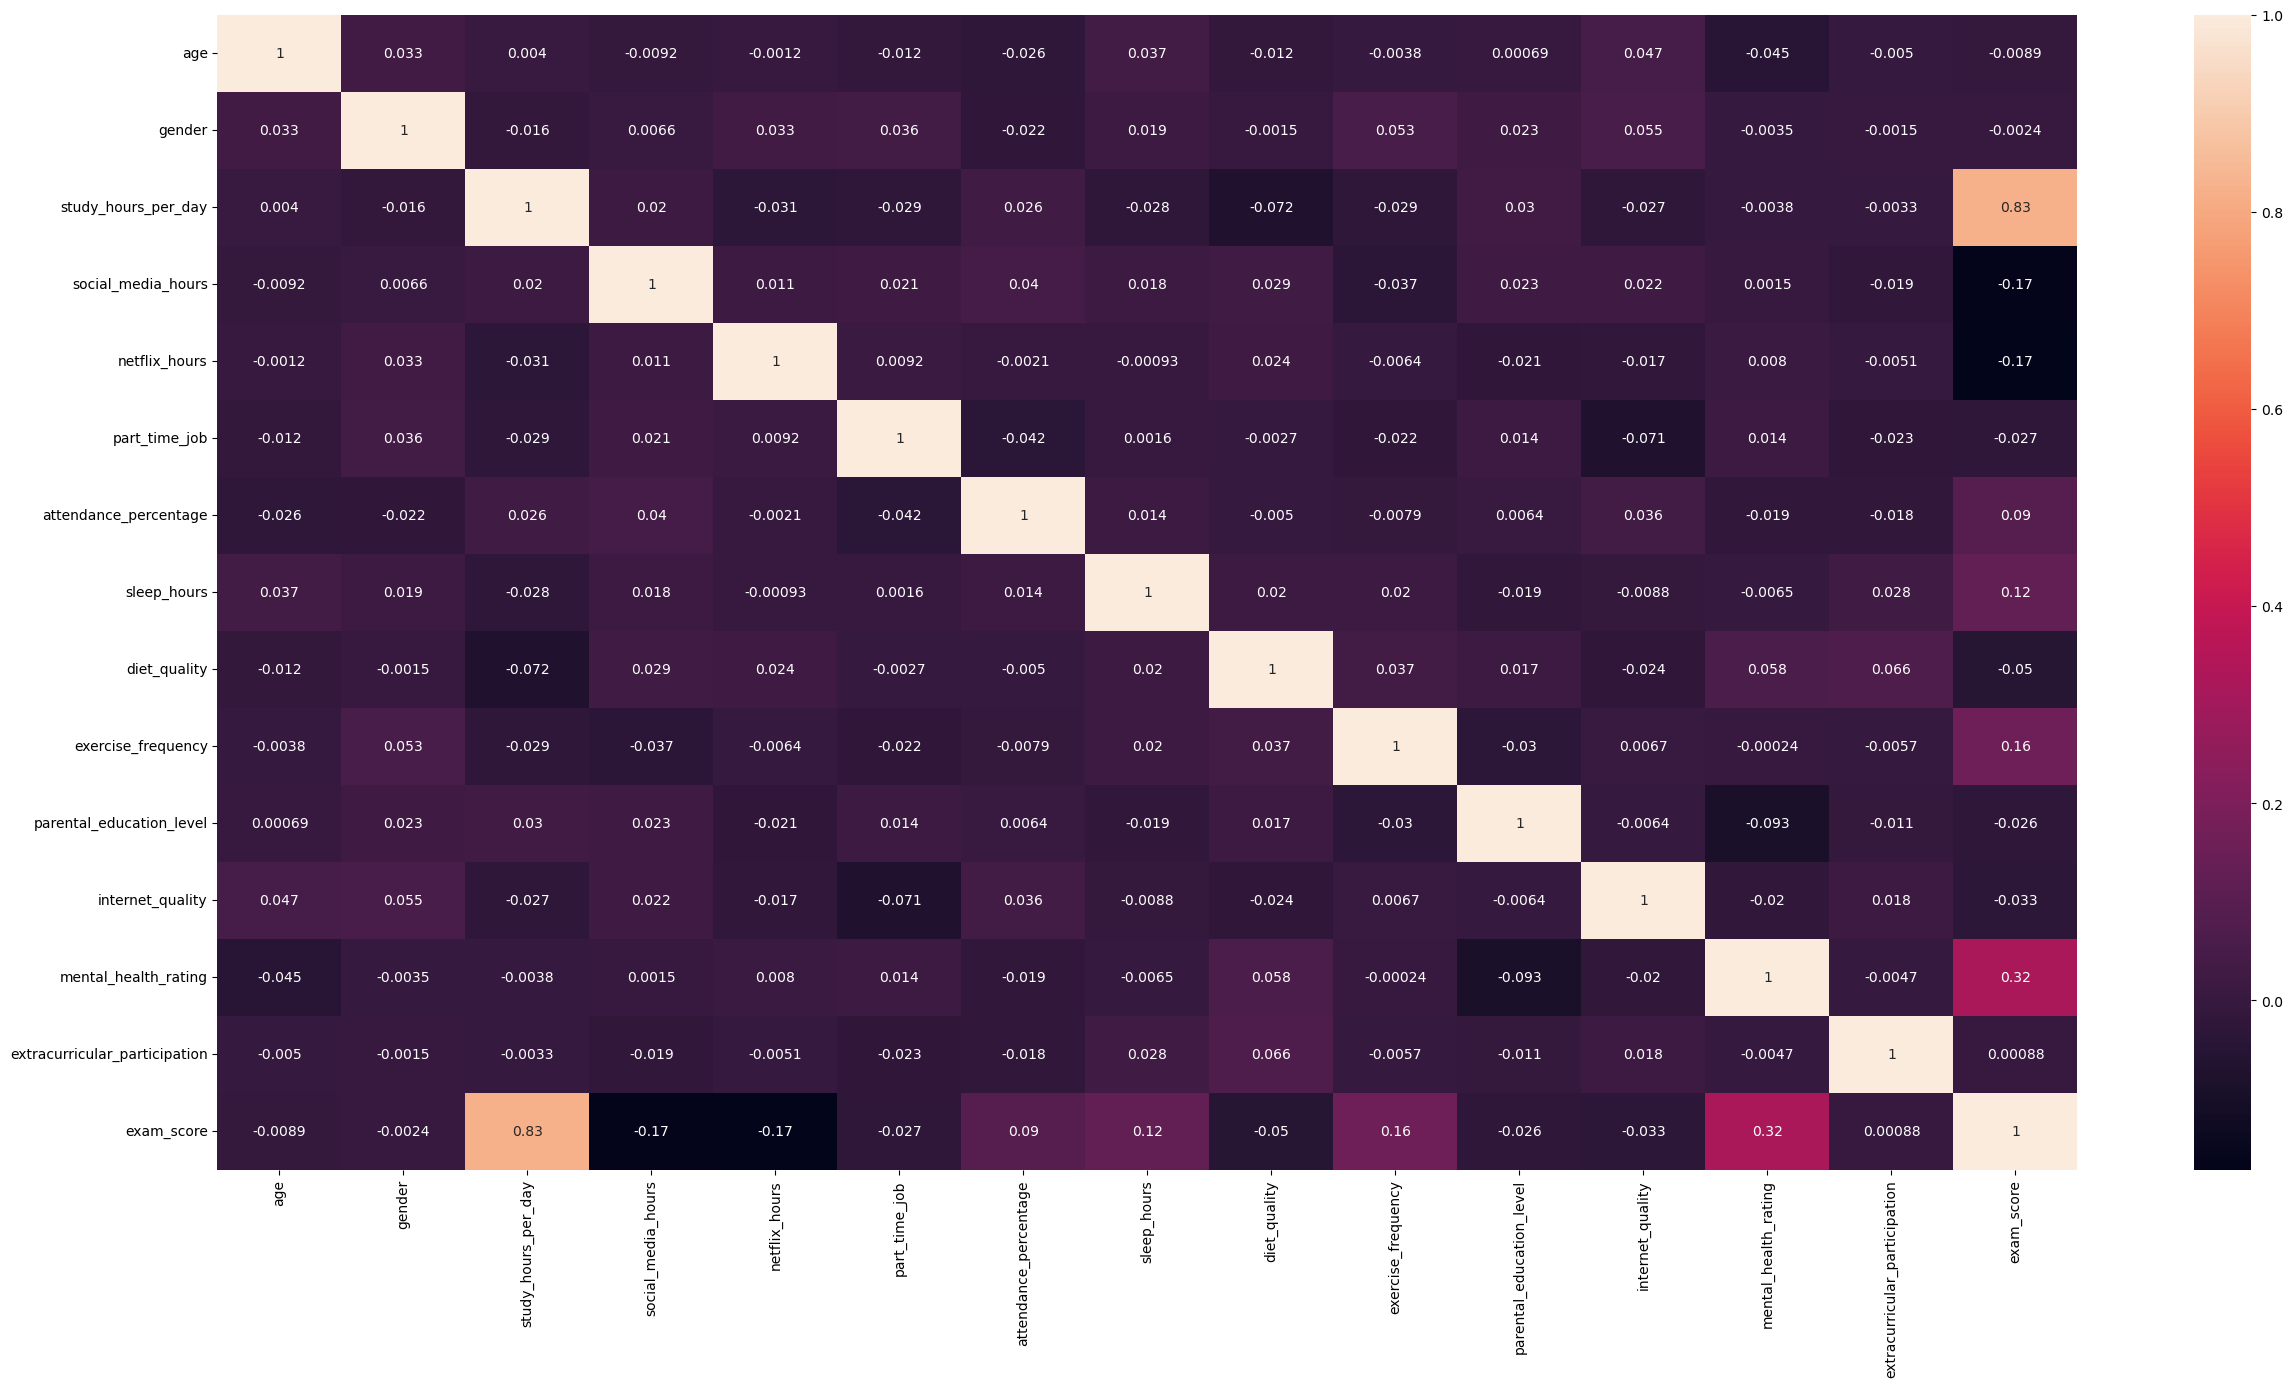

In [13]:
cor=data.corr()
cor
plt.figure(figsize=(30,15))
sns.heatmap(cor,annot=True)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data,columns=data.columns)
scaled_data                      

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,1.084551,-0.976163,-2.418068,-1.114064,-0.669750,-0.523341,0.092426,1.248120,-1.000902,1.461166,1.066464,-1.089750,0.900186,1.464464,-0.793922
1,-0.215870,-0.976163,2.281707,0.251315,0.446965,-0.523341,1.401696,-1.525661,0.337202,1.461166,0.001065,-1.089750,0.900186,-0.682844,1.800846
2,0.217604,0.763878,-1.464491,0.507324,-0.483631,-0.523341,1.135584,1.248120,1.675307,-1.008689,0.001065,1.737098,-1.559339,-0.682844,-2.091307
3,1.084551,-0.976163,-1.736942,1.190013,-0.762810,-0.523341,-1.397800,2.227102,1.675307,0.473224,1.066464,0.323674,-1.559339,1.464464,-2.535616
4,-0.649344,-0.976163,0.987566,1.616694,-1.228108,-0.523341,0.720450,-1.280916,-1.000902,-0.020747,1.066464,0.323674,-1.559339,-0.682844,-0.189661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.217604,-0.976163,-0.647139,-1.711417,-0.204452,-0.523341,-0.759132,0.840211,-1.000902,-0.514718,0.001065,0.323674,0.197465,1.464464,0.384980
996,-1.516291,-0.976163,-0.442801,-1.284736,0.540025,1.910802,0.198871,0.269138,1.675307,-1.008689,0.001065,-1.089750,0.197465,1.464464,-0.219282
997,-0.215870,0.763878,-0.374688,0.080643,-0.483631,-0.523341,-2.366448,0.024393,0.337202,0.967195,-1.064334,0.323674,1.251547,1.464464,-0.308144
998,1.518025,0.763878,1.260017,1.360685,-0.669750,1.910802,1.689097,0.921793,-1.000902,-1.502660,-1.064334,-1.089750,-1.559339,-0.682844,0.005835


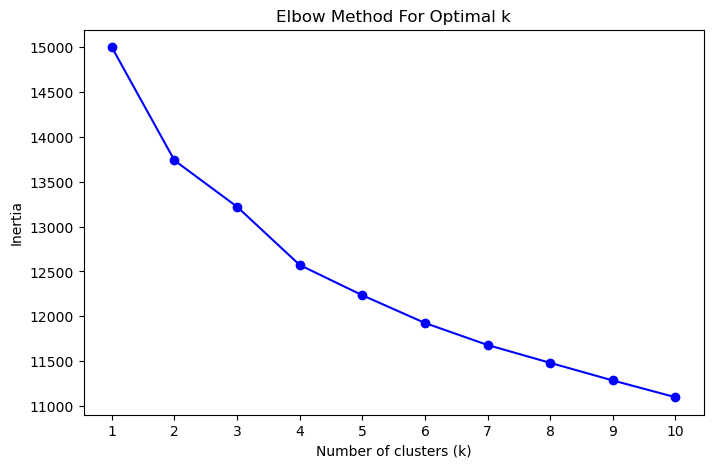

In [15]:
from sklearn.cluster import KMeans
inertia= []
k_range = range(1,11)

for k in k_range:
    kmeans=KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_range)
plt.show()

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
data_components = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters = 4,random_state = 42)
kmeans.fit(data_components)

Labels = kmeans.labels_

centriod = kmeans.cluster_centers_
data["Labels"] = Labels
print(centriod)
data

[[-1.0368788   0.83797139]
 [ 1.3892031   0.82898445]
 [ 0.82007442 -0.8306009 ]
 [-1.28025236 -0.96643022]]


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,Labels
0,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1,56.2,0
1,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0,100.0,1
2,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0,34.3,3
3,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8,3
4,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0,66.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,0,2.6,0.5,1.6,0,77.0,7.5,0,2,1,1,6,1,76.1,2
996,17,0,2.9,1.0,2.4,1,86.0,6.8,2,1,1,0,6,1,65.9,0
997,20,1,3.0,2.6,1.3,0,61.9,6.5,1,5,0,1,9,1,64.4,0
998,24,1,5.4,4.1,1.1,1,100.0,7.6,0,0,0,0,1,0,69.7,2


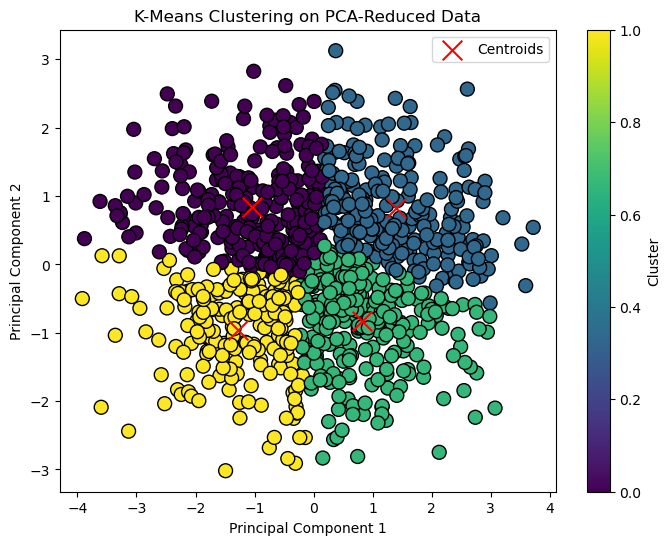

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(data_components[:, 0], data_components[:, 1], c=Labels, cmap='viridis', edgecolor='k', s=100)
plt.scatter(centriod[:, 0], centriod[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In [18]:
grouping=data["Labels"].value_counts()
grouping

Labels
0    279
2    277
1    237
3    207
Name: count, dtype: int64